<a href="https://www.kaggle.com/code/binisme/cs2-analysis?scriptVersionId=200472916" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# CS:GO Analytics Project
## Introduction
In this notebook, we will explore the fascinating world of Counter-Strike: Global Offensive (CS:GO) through a comprehensive analysis of three distinct datasets—maps_statistics, weapons_statistics, and competitive_players_statistics. Each dataset holds a wealth of information, allowing us to gain insights into the dynamics of the game, weapon performance, and the prowess of individual players.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

df_map = pd.read_csv('/kaggle/input/counter-strike-2-statistics/maps_statistics.csv')
df_top = pd.read_csv('/kaggle/input/counter-strike-2-statistics/top_100_players.csv')
df_weapon = pd.read_csv('/kaggle/input/counter-strike-2-statistics/weapons_statistics.csv')

## Data Understanding

In [3]:
df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7%,49.2%,50.8%,"168,288"
1,Mirage,23.9%,49.1%,50.9%,"150,883"
2,Inferno,13.1%,50.3%,49.7%,"82,737"
3,Nuke,4.3%,47.0%,53.0%,"27,211"
4,Vertigo,4.0%,47.8%,52.2%,"25,390"


In [4]:
df_top.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses
0,1,sH0oRuk YouTube,"31,203",Asia,278,9,98
1,2,TTpo100Razeb Daniel,"29,626",Europe,250,12,174
2,3,REZPEZTâ¢,"29,588",Europe,133,2,58
3,4,rAdek1ngâ,"29,548",South America,75,1,8
4,5,ð,"29,480",Asia,106,0,10


In [5]:
df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8%,59.4%,16.7%,"370,567"
1,M4A1-S,1.1,14.6%,60.3%,18.3%,"181,934"
2,AWP,1.6,14.5%,68.7%,10.1%,"164,754"
3,M4A1,1.2,18.0%,60.6%,15.5%,"104,012"
4,USP-S,0.9,21.2%,63.5%,10.5%,"94,958"


In [6]:
df_map.describe()

,Map,Play Rate,T-Win %,CT-Win %,Matches
count,10,10,10,10,10
unique,10,10,10,10,10
top,Dust II,26.7%,49.2%,50.8%,"168,288"
freq,1,1,1,1,1


In [7]:
df_top.describe()

,Rank,Wins,Ties,Losses
count,100.000000,100.00000,100.000000,100.000000
mean,50.500000,95.96000,2.170000,35.190000
std,29.011492,73.86432,3.206858,47.761126
min,1.000000,21.00000,0.000000,0.000000
25%,25.750000,37.75000,0.000000,7.000000
50%,50.500000,79.50000,1.000000,16.000000
75%,75.250000,130.25000,2.250000,44.000000
max,100.000000,376.00000,17.000000,305.000000


In [8]:
df_weapon.describe()

,KPR
count,20.000000
mean,1.060000
std,0.290915
min,0.700000
25%,0.875000
50%,1.000000
75%,1.200000
max,1.900000


## Data Preparation

### Clean data

In [9]:
# Convert perccentage to decimals
df_map['Play Rate'] = df_map['Play Rate'].str.rstrip('%').astype(float)
df_map['T-Win %'] = df_map['T-Win %'].str.rstrip('%').astype(float)
df_map['CT-Win %'] = df_map['CT-Win %'].str.rstrip('%').astype(float)
df_map['Matches'] = df_map['Matches'].str.replace(',','').astype(int)

In [10]:
df_map.head()

,Map,Play Rate,T-Win %,CT-Win %,Matches
0,Dust II,26.7,49.2,50.8,168288
1,Mirage,23.9,49.1,50.9,150883
2,Inferno,13.1,50.3,49.7,82737
3,Nuke,4.3,47.0,53.0,27211
4,Vertigo,4.0,47.8,52.2,25390


In [11]:
df_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Map        10 non-null     object 
 1   Play Rate  10 non-null     float64
 2   T-Win %    10 non-null     float64
 3   CT-Win %   10 non-null     float64
 4   Matches    10 non-null     int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 528.0+ bytes


In [12]:
df_weapon['HS %'] = df_weapon['HS %'].str.rstrip('%').astype(float)
df_weapon['Chest %'] = df_weapon['Chest %'].str.rstrip('%').astype(float)
df_weapon['Leg %'] = df_weapon['Leg %'].str.rstrip('%').astype(float)
df_weapon['Total Kills'] = df_weapon['Total Kills'].str.replace(',','').astype(int)

In [13]:
df_weapon.head()

,Weapon,KPR,HS %,Chest %,Leg %,Total Kills
0,AK-47,1.2,17.8,59.4,16.7,370567
1,M4A1-S,1.1,14.6,60.3,18.3,181934
2,AWP,1.6,14.5,68.7,10.1,164754
3,M4A1,1.2,18.0,60.6,15.5,104012
4,USP-S,0.9,21.2,63.5,10.5,94958


In [14]:
df_top['CS Rating'] = df_top['CS Rating'].str.replace(',','').astype(int)


### Feature Engineering

In [15]:
# win ratio = win/win+tie+loss
df_top['Win_Ratio'] = df_top['Wins'] / (df_top['Wins'] + df_top['Ties'] + df_top['Losses'])

In [16]:
# total matches of players
df_top['Total Matches'] = df_top['Wins'] + df_top['Ties'] + df_top['Losses']

In [17]:
# weapon effectiveness
df_weapon['Effectiveness'] = df_weapon['KPR'] * df_weapon['HS %'] / 100

## EDA

### Visualization Distribution

#### Play Rate by Map

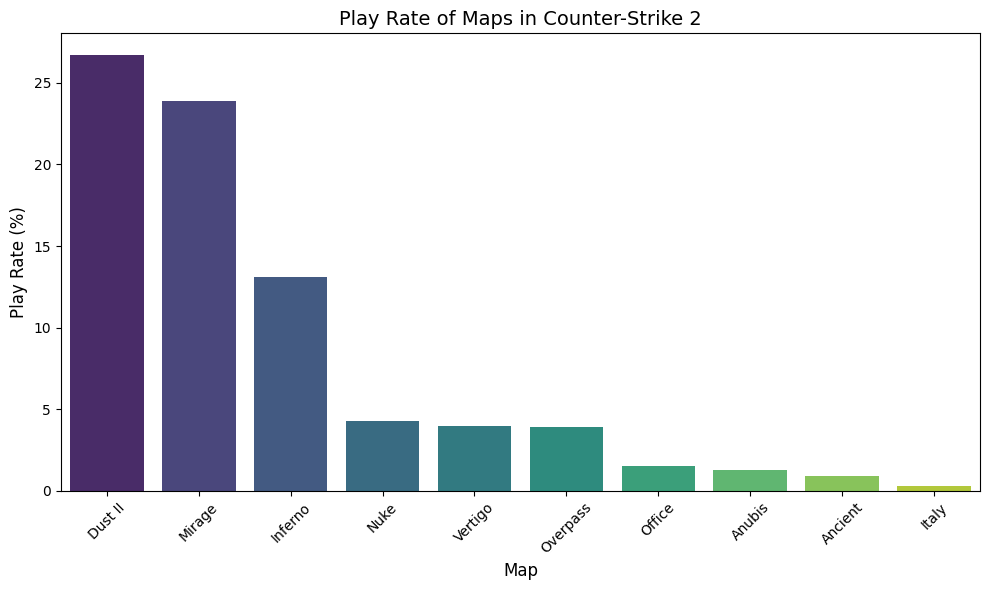

In [18]:
# Play Rate bar chart
# Sort the data by 'Play Rate' to make it easier to see the most and least popular maps
df_map_play = df_map.sort_values(by='Play Rate', ascending=False)

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Map', y='Play Rate', data=df_map_play, palette='viridis')

# # Highlight the most and least popular maps
# max_play_rate = df_map['Play Rate'].max()
# min_play_rate = df_map['Play Rate'].min()

# # Iterate through the bars to change the color for the highest and lowest values
# for i, bar in enumerate(bar_plot.patches):
#     if bar.get_height() == max_play_rate:
#         bar.set_color('blue')  # Most popular map (highlighted in blue)
#     elif bar.get_height() == min_play_rate:
#         bar.set_color('red')  # Least popular map (highlighted in red)

# Add labels and title
plt.title('Play Rate of Maps in Counter-Strike 2', fontsize=14)
plt.xlabel('Map', fontsize=12)
plt.ylabel('Play Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

- Players play Dust II the most
- While Italy is dislike by most of players

#### Compare Win Rate between T & CT sides

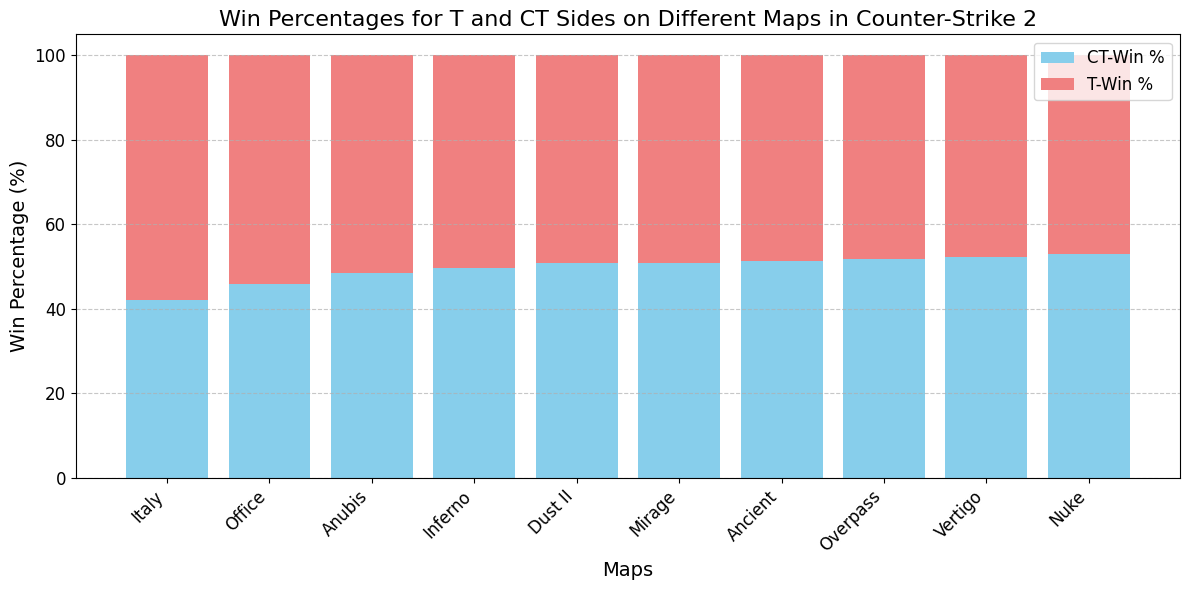

In [19]:
# Compare Win Rate of T and CT sides on different maps
# Sort the data by T-Win % for better visual comparison
df_win_percentages = df_map.sort_values(by='T-Win %', ascending=False)

# Create a stacked bar chart using matplotlib
plt.figure(figsize=(12, 6))

# Plot the CT-Win % as the bottom part of the bar
plt.bar(df_win_percentages['Map'], df_win_percentages['CT-Win %'], label='CT-Win %', color='skyblue')

# Plot the T-Win % on top of the CT-Win % bars
plt.bar(df_win_percentages['Map'], df_win_percentages['T-Win %'], bottom=df_win_percentages['CT-Win %'], label='T-Win %', color='lightcoral')

# Add labels and title
plt.xlabel('Maps', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.title('Win Percentages for T and CT Sides on Different Maps in Counter-Strike 2', fontsize=16)
plt.legend(fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()

From the stacked bar chart:
- most map have a fair opportunities between 2 sides
- while Italy and Office tend to a little dominant by CT side

#### Total kills by Weapons

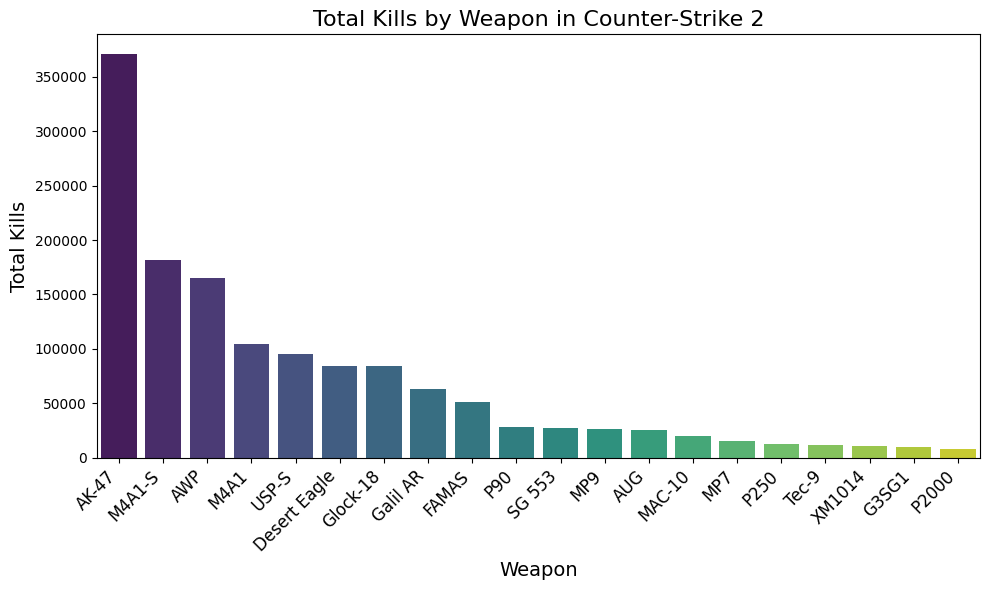

In [20]:
# Top 10 kills by weapons
df_weapon_kill = df_weapon.sort_values(by='Total Kills', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Weapon', y='Total Kills', data=df_weapon_kill, palette='viridis')
plt.xlabel('Weapon', fontsize=14)
plt.ylabel('Total Kills', fontsize=14)
plt.title('Total Kills by Weapon in Counter-Strike 2', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

From the bar chart:
- ak-47 have highest chance to get a kill
- While p2000 is the hardest weapon to get a kill

#### Top 10 HS by weapons

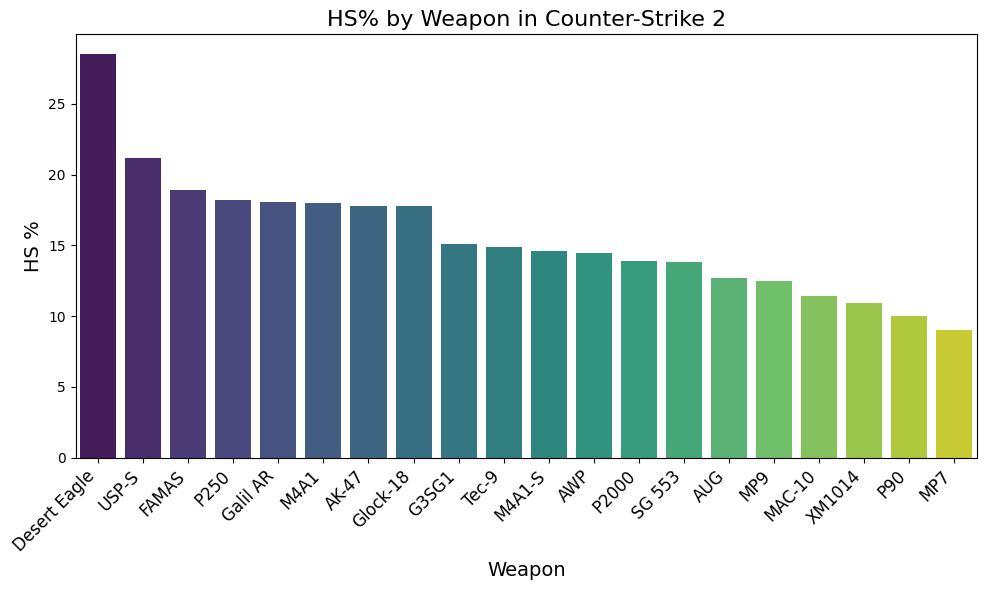

In [21]:
# Top 10 HS by weapons
df_weapon_hs = df_weapon.sort_values(by='HS %', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Weapon', y='HS %', data=df_weapon_hs, palette='viridis')
plt.xlabel('Weapon', fontsize=14)
plt.ylabel('HS %', fontsize=14)
plt.title('HS% by Weapon in Counter-Strike 2', fontsize=16)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

As you can see from the bar chart:
- DE and USP are the 1 shot pistol, so they have high HS rate
- while MP7 and P90, types of run shoot SMG, are quite hard to aim for the head

Individual Player Profiling:
Focus on the top 100 players in competitive CS:GO, examining their rankings, CS Ratings, and regional distributions.
Analyze the performance metrics of notable players like sH0oRuk YouTube, TTpo100Razeb Daniel, and REZPEZT™.

#### CS Rating by Region

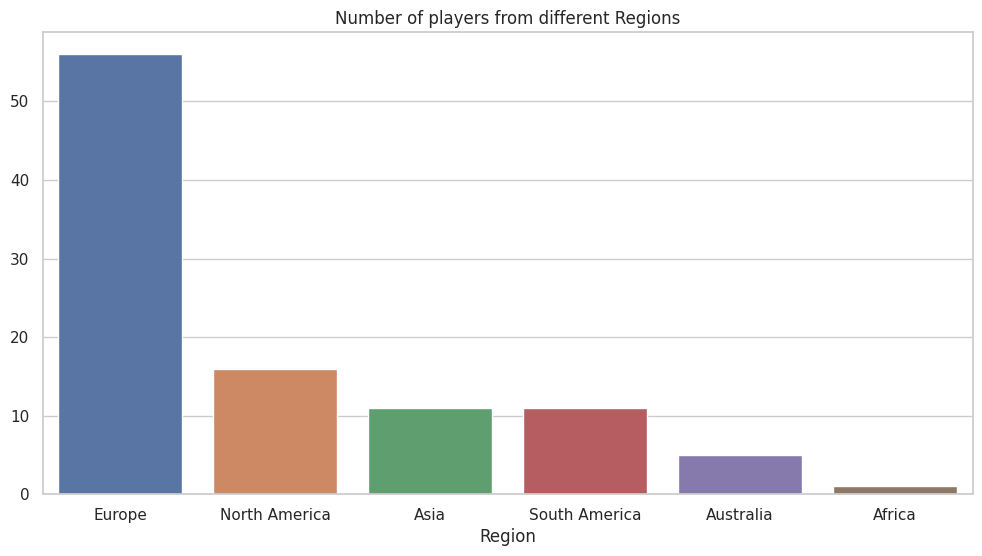

In [22]:
sns.set(style = 'whitegrid')

num_regions = df_top['Region'].value_counts()

plt.figure(figsize=(12,6))
sns.barplot(x = num_regions.index, y =num_regions.values)
plt.title('Number of players from different Regions')
plt.show()

- Europe has the large number of top CS players
- While Africa having the least number of players, maybe due to low access to modern technology

In [23]:
# Group by 'Region' and calculate desired aggregations
region_group = df_top.groupby('Region').agg({
    'CS Rating': 'mean',     # Average CS Rating per region
    'Wins': 'sum',           # Total Wins per region
    'Ties': 'sum',           # Total Ties per region
    'Losses': 'sum',         # Total Losses per region
    'Win_Ratio': 'mean',     # Average Win Ratio per region
    'Total Matches': 'sum'   # Total Matches per region
}).reset_index()

# Rename columns for better readability
region_group.columns = ['Region', 'Avg CS Rating', 'Total Wins', 'Total Ties', 'Total Losses', 'Avg Win Ratio', 'Total Matches']

# Display the grouped data
region_group

,Region,Avg CS Rating,Total Wins,Total Ties,Total Losses,Avg Win Ratio,Total Matches
0,Africa,27342.000000,154,2,49,0.751220,205
1,Asia,28231.090909,1605,35,707,0.772692,2347
2,Australia,27395.400000,476,15,132,0.798327,623
3,Europe,27986.428571,4475,103,1775,0.776351,6353
4,North America,27711.750000,1622,31,527,0.779318,2180
5,South America,28236.454545,1264,31,329,0.852283,1624


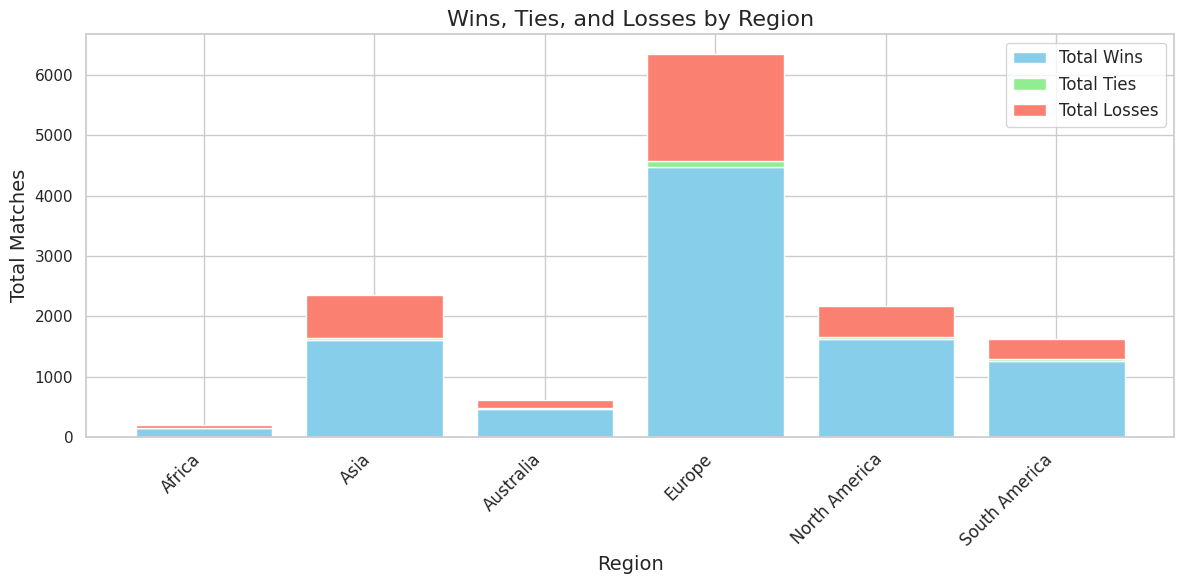

In [24]:
# 2. Stacked Bar Chart for Wins, Ties, and Losses by Region
plt.figure(figsize=(12, 6))

# Plot total wins as the base bar
plt.bar(region_group['Region'], region_group['Total Wins'], label='Total Wins', color='skyblue')

# Plot total ties stacked on top of wins
plt.bar(region_group['Region'], region_group['Total Ties'], bottom=region_group['Total Wins'], label='Total Ties', color='lightgreen')

# Plot total losses stacked on top of wins and ties
bottom_values = region_group['Total Wins'] + region_group['Total Ties']
plt.bar(region_group['Region'], region_group['Total Losses'], bottom=bottom_values, label='Total Losses', color='salmon')

# Add title and labels
plt.title('Wins, Ties, and Losses by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Total Matches', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

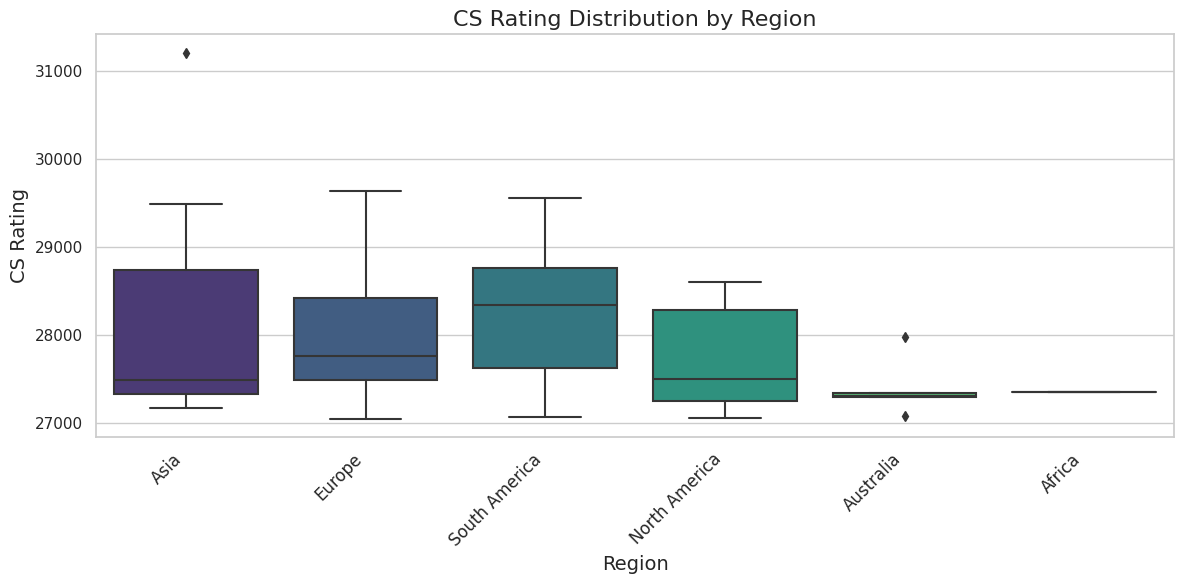

In [25]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

# Create a figure for the box plot and violin plot
plt.figure(figsize=(12, 6))

# Create a box plot of CS Rating by Region
sns.boxplot(x='Region', y='CS Rating', data=df_top, palette='viridis')

# Add title and labels for better readability
plt.title('CS Rating Distribution by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('CS Rating', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

Asia:
* has a broader range compared to other region
* has an outlier above 31000, indicating 1 person with significant score
* median close to bottom line, meaning most players closer to lower 50% rating
* imbalance whisker with extreme outlier of highest rating

Europe:
* has long imbalance whisker, indicate more extreme outliers on top

South America:
* high median, which closer to top line
* whisker more balance, indicate uniform distribution of rating

North America:
* Rating range quite similar to Europe & South America

Australia:
* much narrower rating range, indicate less variability
* 2 outliers differentiate from the rest

Africa:
* range almost a flat line, suggest limited data

### Correlations

#### Check the relationship between CS Rating and Wins to understand if the rating truly reflects winning tendencies

In [26]:
# Correlation Calculation
from scipy.stats import pearsonr
corr, _ = pearsonr(df_top['CS Rating'], df_top['Wins'])
print(f"Pearson correlation between CS Rating and Wins: {corr:.2f}")

Pearson correlation between CS Rating and Wins: 0.08


-> no relationship between CS Rating & Wins

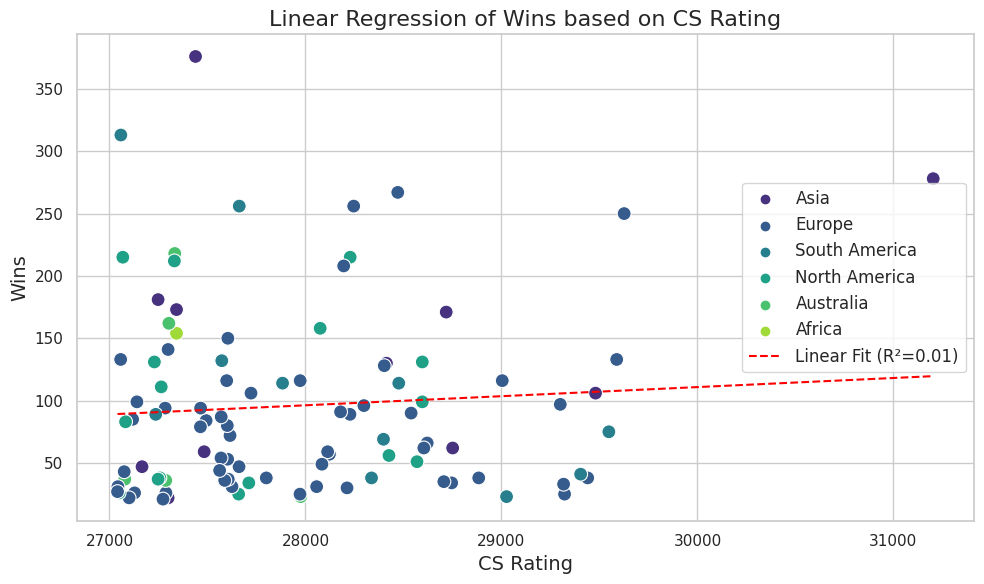

In [27]:
from sklearn.linear_model import LinearRegression
# Linear Regression
# Reshape the data for scikit-learn
X = df_top[['CS Rating']]
y = df_top['Wins']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the coefficient and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Create a line of best fit
x_range = np.linspace(df_top['CS Rating'].min(), df_top['CS Rating'].max(), 100)
y_range = slope * x_range + intercept

# Plot the regression line on the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CS Rating', y='Wins', data=df_top, hue='Region', palette='viridis', s=100)
plt.plot(x_range, y_range, color='red', linestyle='--', label=f'Linear Fit (R²={model.score(X, y):.2f})')
plt.title('Linear Regression of Wins based on CS Rating', fontsize=16)
plt.xlabel('CS Rating', fontsize=14)
plt.ylabel('Wins', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Explore correlations between Play Rate of maps and Win % for teams to see if certain maps favor a specific team side.

In [28]:
# 1. Calculate correlations
corr_t = pearsonr(df_map['Play Rate'], df_map['T-Win %'])[0]
corr_ct = pearsonr(df_map['Play Rate'], df_map['CT-Win %'])[0]

print(f"Correlation between Play Rate and T-Win %: {corr_t:.2f}")
print(f"Correlation between Play Rate and CT-Win %: {corr_ct:.2f}")

Correlation between Play Rate and T-Win %: -0.30
Correlation between Play Rate and CT-Win %: 0.30


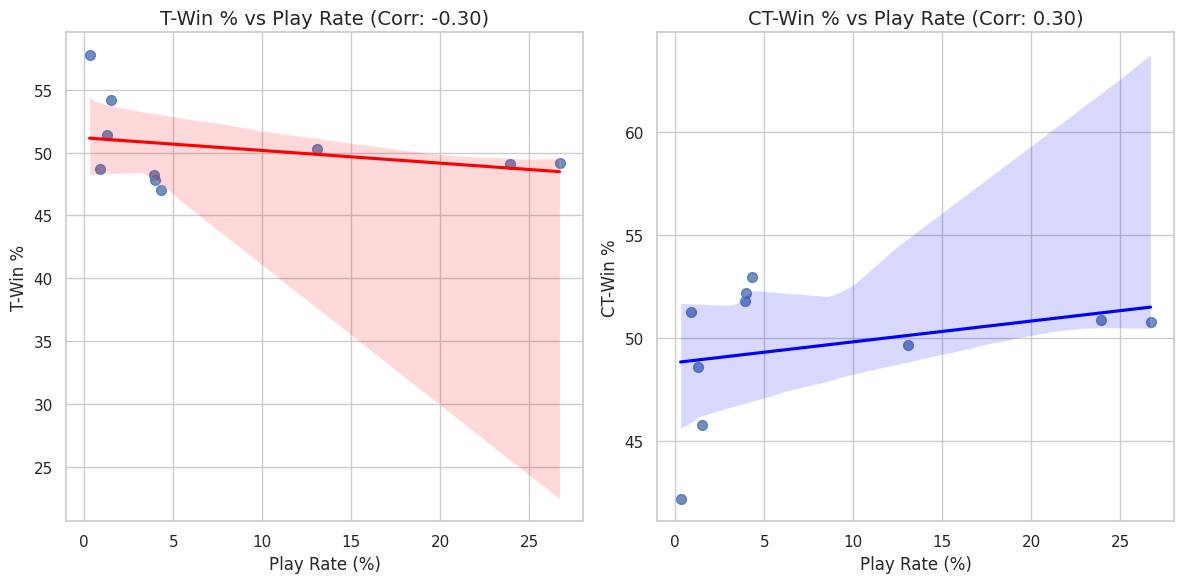

In [29]:
# 2. Create scatter plots with regression lines
plt.figure(figsize=(12, 6))

# T-Win % vs. Play Rate
plt.subplot(1, 2, 1)
sns.regplot(x='Play Rate', y='T-Win %', data=df_map, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title(f'T-Win % vs Play Rate (Corr: {corr_t:.2f})', fontsize=14)
plt.xlabel('Play Rate (%)', fontsize=12)
plt.ylabel('T-Win %', fontsize=12)
plt.grid(True)

# CT-Win % vs. Play Rate
plt.subplot(1, 2, 2)
sns.regplot(x='Play Rate', y='CT-Win %', data=df_map, scatter_kws={'s': 50}, line_kws={'color': 'blue'})
plt.title(f'CT-Win % vs Play Rate (Corr: {corr_ct:.2f})', fontsize=14)
plt.xlabel('Play Rate (%)', fontsize=12)
plt.ylabel('CT-Win %', fontsize=12)
plt.grid(True)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

-> a slight positive correlation between Play Rate and CT Wins, and conversely for T Wins, indicate that CT side is more favorable

#### Analyze HS % vs. KPR to determine if headshot-heavy weapons also tend to result in more kills.

Correlation between HS % and KPR: -0.09


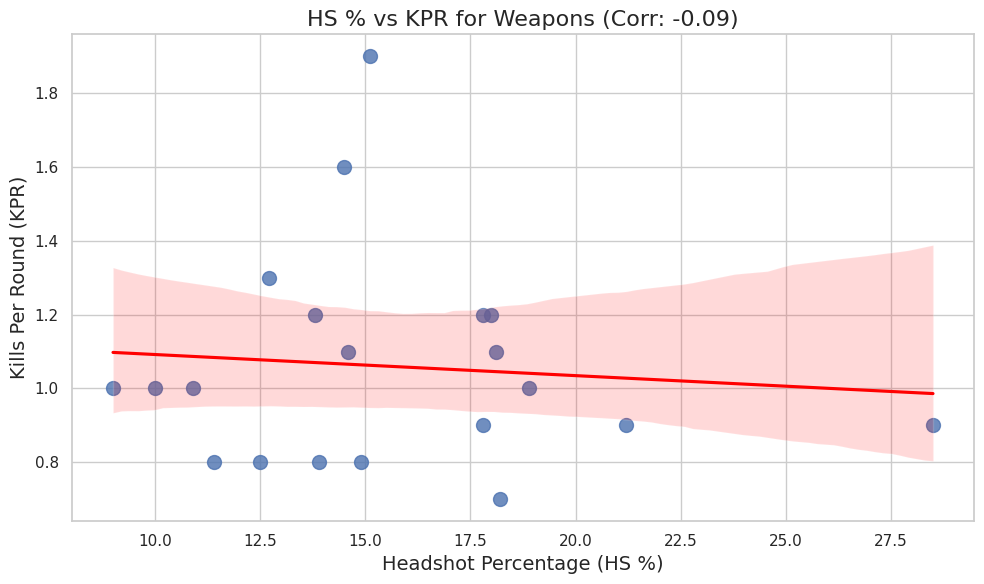

In [30]:
# Calculate the correlation between HS % and KPR
corr_hs_kpr = pearsonr(df_weapon['HS %'], df_weapon['KPR'])[0]
print(f"Correlation between HS % and KPR: {corr_hs_kpr:.2f}")

# Create a scatter plot with a regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='HS %', y='KPR', data=df_weapon, scatter_kws={'s': 100}, line_kws={'color': 'red'})
plt.title(f'HS % vs KPR for Weapons (Corr: {corr_hs_kpr:.2f})', fontsize=16)
plt.xlabel('Headshot Percentage (HS %)', fontsize=14)
plt.ylabel('Kills Per Round (KPR)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

- no correlation btw HS % and KPR

In [31]:
df_top.head()

,Rank,Name,CS Rating,Region,Wins,Ties,Losses,Win_Ratio,Total Matches
0,1,sH0oRuk YouTube,31203,Asia,278,9,98,0.722078,385
1,2,TTpo100Razeb Daniel,29626,Europe,250,12,174,0.573394,436
2,3,REZPEZTâ¢,29588,Europe,133,2,58,0.689119,193
3,4,rAdek1ngâ,29548,South America,75,1,8,0.892857,84
4,5,ð,29480,Asia,106,0,10,0.913793,116


ANOVA Result: F-statistic = 1.0694, p-value = 0.3824
Fail to reject the null hypothesis: There is no significant difference in win ratios between regions.


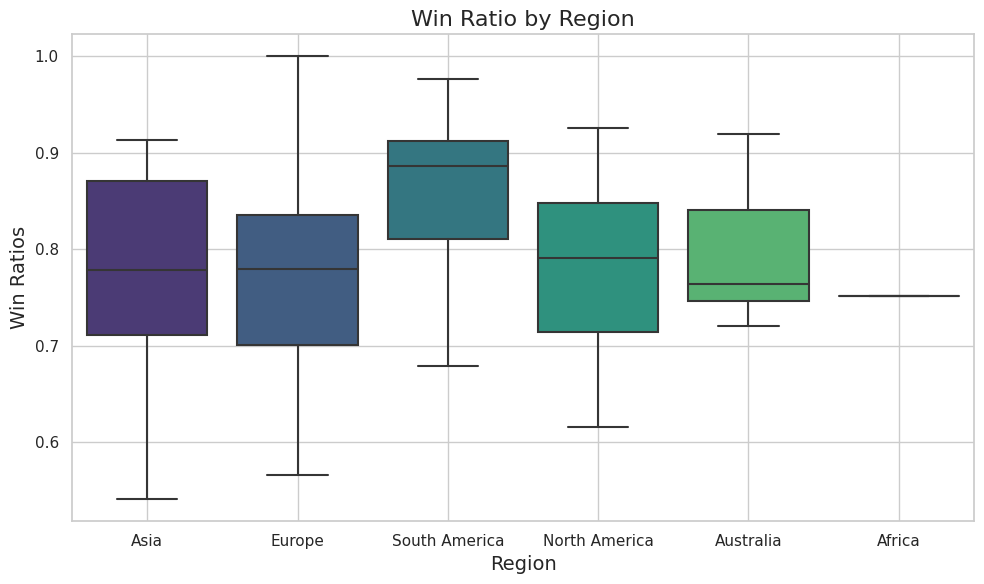


Detailed ANOVA table:
              sum_sq    df         F  PR(>F)
C(Region)  0.058159   5.0  1.069362  0.3824
Residual   1.022473  94.0       NaN     NaN


In [32]:
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 1. Perform ANOVA using scipy
asia_win_ratio = df_top[df_top['Region'] == 'Asia']['Win_Ratio']
europe_win_ratio = df_top[df_top['Region'] == 'Europe']['Win_Ratio']
south_america_win_ratio = df_top[df_top['Region'] == 'South America']['Win_Ratio']
north_america_win_ratio = df_top[df_top['Region'] == 'North America']['Win_Ratio']
australia_win_ratio = df_top[df_top['Region'] == 'Australia']['Win_Ratio']
africa_win_ratio = df_top[df_top['Region'] == 'Africa']['Win_Ratio']

# Perform the ANOVA test
anova_result = f_oneway(asia_win_ratio, europe_win_ratio, south_america_win_ratio, north_america_win_ratio, australia_win_ratio, africa_win_ratio)
print(f"ANOVA Result: F-statistic = {anova_result.statistic:.4f}, p-value = {anova_result.pvalue:.4f}")

# 2. Interpretation
alpha = 0.05
if anova_result.pvalue < alpha:
    print("Reject the null hypothesis: There is a significant difference in win ratios between regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in win ratios between regions.")

# 3. Visualize the data with a box plot for better understanding
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Win_Ratio', data=df_top, palette='viridis')
plt.title('Win Ratio by Region', fontsize=16)
plt.xlabel('Region', fontsize=14)
plt.ylabel('Win Ratios', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Detailed ANOVA table using statsmodels (optional, for deeper analysis)
model = ols('Win_Ratio ~ C(Region)', data=df_top).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nDetailed ANOVA table:\n", anova_table)

Paired t-test result: t-statistic = 0.3521, p-value = 0.7329
Fail to reject the null hypothesis: There is no significant difference between T-Win % and CT-Win % across maps.


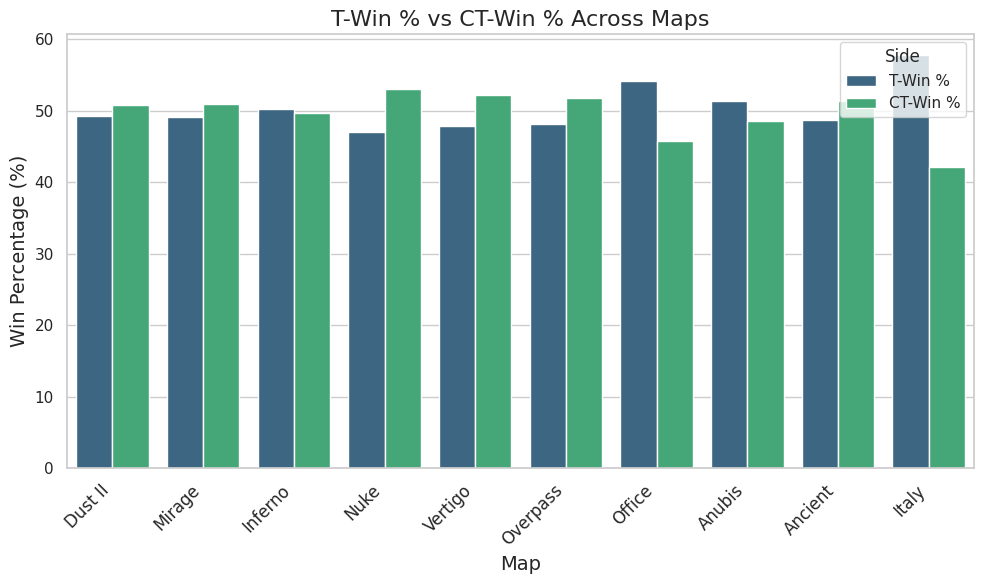

In [33]:
from scipy.stats import ttest_rel
# Perform paired t-test between T-Win % and CT-Win % for each map
t_statistic, p_value = ttest_rel(df_map['T-Win %'], df_map['CT-Win %'])

print(f"Paired t-test result: t-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}")

# Interpretation of the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between T-Win % and CT-Win % across maps.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between T-Win % and CT-Win % across maps.")

# Visualize the T-Win % and CT-Win % for each map to see the differences
plt.figure(figsize=(10, 6))
df_map_melted = df_map.melt(id_vars='Map', value_vars=['T-Win %', 'CT-Win %'], var_name='Side', value_name='Win %')

sns.barplot(x='Map', y='Win %', hue='Side', data=df_map_melted, palette='viridis')
plt.title('T-Win % vs CT-Win % Across Maps', fontsize=16)
plt.xlabel('Map', fontsize=14)
plt.ylabel('Win Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 800x500 with 0 Axes>

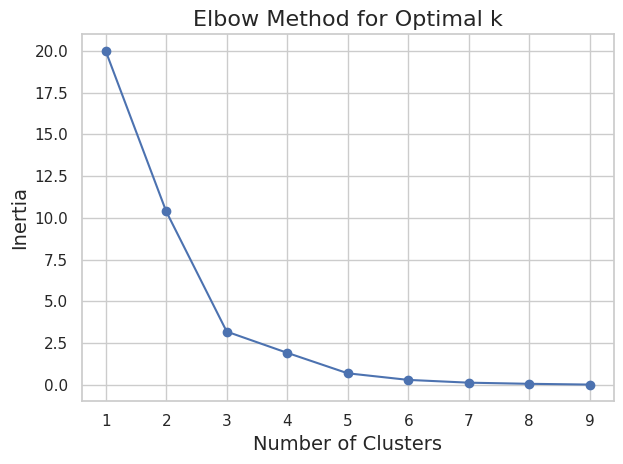

In [34]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Create a new feature for Win % Balance
df_map['Win % Balance'] = df_map['T-Win %'] - df_map['CT-Win %']

# Select the features for clustering
X = df_map[['Play Rate', 'Win % Balance']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
range_n_clusters = range(1, 10)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method to find the optimal number of clusters
plt.figure(figsize=(8, 5))
plt.show()
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal k', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Inertia', fontsize=14)
plt.grid(True)
plt.tight_layout()

        Map  Play Rate  Win % Balance  Cluster
0   Dust II       26.7           -1.6        1
1    Mirage       23.9           -1.8        1
2   Inferno       13.1            0.6        1
3      Nuke        4.3           -6.0        0
4   Vertigo        4.0           -4.4        0
5  Overpass        3.9           -3.6        0
6    Office        1.5            8.4        2
7    Anubis        1.3            2.8        0
8   Ancient        0.9           -2.6        0
9     Italy        0.3           15.6        2
         Play Rate  Win % Balance  Number of Maps
Cluster                                          
0         2.880000      -2.760000               5
1        21.233333      -0.933333               3
2         0.900000      12.000000               2


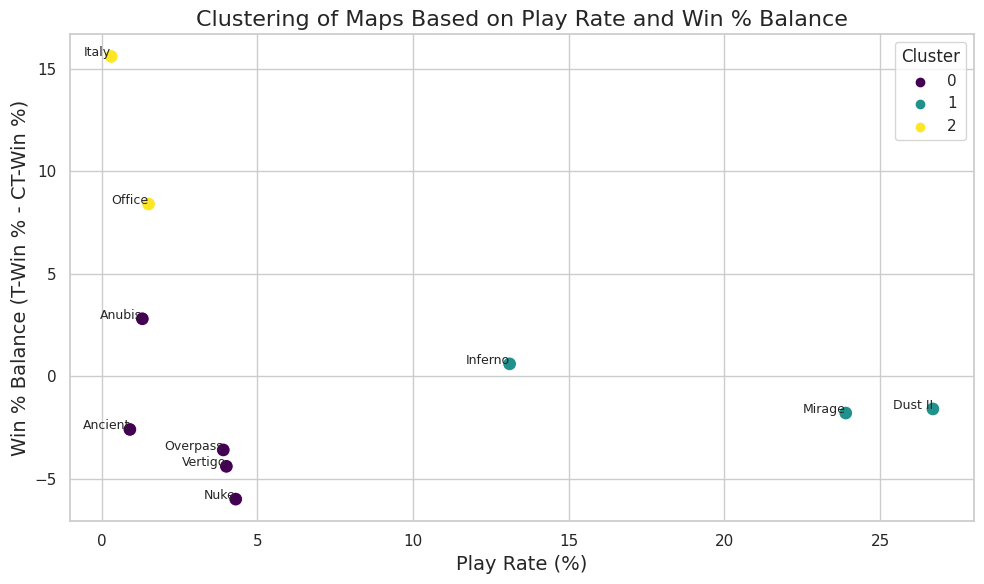

In [35]:
# Fit K-means with k=3
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
df_map['Cluster'] = kmeans.fit_predict(X_scaled)

# Display the first few rows to see the cluster assignments
print(df_map[['Map', 'Play Rate', 'Win % Balance', 'Cluster']])

# Analyze the characteristics of each cluster
cluster_summary = df_map.groupby('Cluster').agg({
    'Play Rate': 'mean',
    'Win % Balance': 'mean',
    'Map': 'count'
}).rename(columns={'Map': 'Number of Maps'})

print(cluster_summary)

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Play Rate', y='Win % Balance', hue='Cluster', data=df_map, palette='viridis', s=100)
for i, row in df_map.iterrows():
    plt.text(row['Play Rate'], row['Win % Balance'], row['Map'], fontsize=9, ha='right')

plt.title('Clustering of Maps Based on Play Rate and Win % Balance', fontsize=16)
plt.xlabel('Play Rate (%)', fontsize=14)
plt.ylabel('Win % Balance (T-Win % - CT-Win %)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()

### Regression Analysis

#### Predict CS Rating based on Wins, Losses, and Ties using linear regression.

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# 1. Predict CS Rating using Wins, Losses, and Ties (Linear Regression)
# Prepare the data
X_players = df_top[['Wins', 'Losses', 'Ties']]
y_players = df_top['CS Rating']

# Split data into training and testing sets
X_train_players, X_test_players, y_train_players, y_test_players = train_test_split(X_players, y_players, test_size=0.2, random_state=42)

# Create and fit the model
model_players = LinearRegression()
model_players.fit(X_train_players, y_train_players)

# Make predictions
y_pred_players = model_players.predict(X_test_players)

# Print results
print("Linear Regression for CS Rating Prediction:")
print(f"Coefficients: {model_players.coef_}")
print(f"Intercept: {model_players.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_test_players, y_pred_players):.2f}")
print(f"R^2 Score: {r2_score(y_test_players, y_pred_players):.2f}\n")

# Detailed regression summary using statsmodels
X_train_players_sm = sm.add_constant(X_train_players)  # Add intercept term
model_players_sm = sm.OLS(y_train_players, X_train_players_sm).fit()
print(model_players_sm.summary())

Linear Regression for CS Rating Prediction:
Coefficients: [ 0.80317408 -1.52156991 -5.35373846]
Intercept: 27905.270773419546
Mean Squared Error: 979881.20
R^2 Score: -0.05

                            OLS Regression Results                            
Dep. Variable:              CS Rating   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.036
Method:                 Least Squares   F-statistic:                   0.09391
Date:                Fri, 11 Oct 2024   Prob (F-statistic):              0.963
Time:                        12:56:36   Log-Likelihood:                -640.74
No. Observations:                  80   AIC:                             1289.
Df Residuals:                      76   BIC:                             1299.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

- model is not accurate with large MSE since insufficient data

In [37]:
# 2. Analyze the impact of KPR and HS % on Total Kills (Multiple Regression)
# Prepare the data
X_weapons = df_weapon[['KPR', 'HS %']]
y_weapons = df_weapon['Total Kills']

# Split data into training and testing sets
X_train_weapons, X_test_weapons, y_train_weapons, y_test_weapons = train_test_split(X_weapons, y_weapons, test_size=0.2, random_state=42)

# Create and fit the model
model_weapons = LinearRegression()
model_weapons.fit(X_train_weapons, y_train_weapons)

# Make predictions
y_pred_weapons = model_weapons.predict(X_test_weapons)

# Print results
print("\nMultiple Regression for Total Kills Prediction:")
print(f"Coefficients: {model_weapons.coef_}")
print(f"Intercept: {model_weapons.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(y_test_weapons, y_pred_weapons):.2f}")
print(f"R^2 Score: {r2_score(y_test_weapons, y_pred_weapons):.2f}\n")

# Detailed regression summary using statsmodels
X_train_weapons_sm = sm.add_constant(X_train_weapons)  # Add intercept term
model_weapons_sm = sm.OLS(y_train_weapons, X_train_weapons_sm).fit()
print(model_weapons_sm.summary())


Multiple Regression for Total Kills Prediction:
Coefficients: [38060.98119089  4808.71560769]
Intercept: -65033.1495680761
Mean Squared Error: 28093879422.07
R^2 Score: -0.28

                            OLS Regression Results                            
Dep. Variable:            Total Kills   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     3.012
Date:                Fri, 11 Oct 2024   Prob (F-statistic):             0.0842
Time:                        12:56:37   Log-Likelihood:                -190.39
No. Observations:                  16   AIC:                             386.8
Df Residuals:                      13   BIC:                             389.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err 

/opt/conda/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


Top Regions:
* regions with higher average CS Ratings generally have high number of total wins and win ratio, Europe and South America for example. Some factors might be training and infrastructure or volume of competitions

Balanced Maps:
* Map with Win % Balance close to 0 indicate equal chances of Win Rate and vice versa

Weapon effectiveness:
* Weapon with high HS % like Desert Eagle and high KPR like AK-47 and M4A1-S are more considered by skilled players
* Weapon like AWP with slightly high Total Kills with its high damage come with instant kills makes it also a favorable choice among players
